#### Data set cleaning
Dataset: 
- _instacart.zip_
- _aisles.csv_
- _departments.csv_
- _instacart_orders.csv_
- _order_products.csv_
- _products_

Author: Luis Sergio Pastrana Lemus  
Date: 2025-05-05

# Data Cleaning – Purchasing Activity Dataset

## __1. Libraries__

In [1]:
from IPython.display import display, HTML
import os
import pandas as pd
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from whick the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *

## __2. Path to Data file__

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "raw" / "instacart.zip"
df_aisles = load_dataset_from_zip(data_file_path, "aisles.csv", sep=';', header='infer', keep_default_na=False)
df_departments = load_dataset_from_zip(data_file_path, "departments.csv", sep=';', header='infer', keep_default_na=False)
df_orders = load_dataset_from_zip(data_file_path, "instacart_orders.csv", sep=';', header='infer', keep_default_na=False)
df_order_products = load_dataset_from_zip(data_file_path, "order_products.csv", sep=';', header='infer', keep_default_na=False)
df_products = load_dataset_from_zip(data_file_path, "products.csv", sep=';', header='infer', keep_default_na=False)

##### `LSPL`

**Note:** `keep_default_na=False` is used to later convert missing values to `pd.NA`.  
This is beneficial because `pd.NA` provides:

- Consistency across data types  
- Type integrity preservation  
- Cleaner logical operations  
- Improved control over missing data

Since high performance or heavy computation is not required here, using `pd.NA` is appropriate.

In [3]:
# Format notebook output
format_notebook()

## __3. Data set cleaning__

In [4]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Aisle id  134 non-null    int64 
 1   AISLE     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Department ID  21 non-null     int64 
 1   DEPARTMENT     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Order ID                478967 non-null  int64 
 1   User ID                 478967 non-null  int64 
 2   Order number            478967 non-null  int64 
 3   Order DOW               478967 non-null  int64 
 4   Order HOUR of day       478967 non-null  int64 
 5   Days Since Prior ORDER  478967 non-null  object
dtypes: int64(5), object(1)
memory usage: 21.9+ MB


In [7]:
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Order ID              int64 
 1    Product ID           int64 
 2      Add To Cart Order  object
 3   Reordered             int64 
dtypes: int64(3), object(1)
memory usage: 138.7+ MB


In [8]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0     Product ID        49694 non-null  int64 
 1    Product Name       49694 non-null  object
 2      Aisle Id         49694 non-null  int64 
 3   Department ID       49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### 3.1. Standardizing String values using "snake case"

#### 3.1.1 Standardizing Column Labels

In [9]:
# Standardize column labels with snake_case format
df_aisles = normalize_columns_headers_format(df_aisles)
df_aisles.columns

Index(['aisle_id', 'aisle'], dtype='object')

In [10]:
df_departments = normalize_columns_headers_format(df_departments)
df_departments.columns

Index(['department_id', 'department'], dtype='object')

In [11]:
df_orders = normalize_columns_headers_format(df_orders)
df_orders.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], dtype='object')

In [12]:
df_order_products = normalize_columns_headers_format(df_order_products)
df_order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [13]:
df_products = normalize_columns_headers_format(df_products)
df_products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

#### 3.1.2 Standardizing Dataframe String values

In [14]:
# Standardize dataa frame string values with snake_case format
df_aisles = normalize_string_format(df_aisles, exclude=['aisle_id'])
df_aisles

,aisle_id,aisle
0,1,prepared_soups_salads
1,2,specialty_cheeses
2,3,energy_granola_bars
3,4,instant_foods
4,5,marinades_meat_preparation
...,...,...
129,130,hot_cereal_pancake_mixes
130,131,dry_pasta
131,132,beauty
132,133,muscles_joints_pain_relief


In [15]:
df_departments = normalize_string_format(df_departments, exclude=['department_id'])
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry_goods_pasta
9,10,bulk


In [16]:
df_products = normalize_string_format(df_products, include=['product_name'])
df_products

,product_id,product_name,aisle_id,department_id
0,1,chocolate_sandwich_cookies,61,19
1,2,all_seasons_salt,104,13
2,3,robust_golden_unsweetened_oolong_tea,94,7
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1
4,5,green_chile_anytime_sauce,5,13
...,...,...,...,...
49689,49690,high_performance_energy_drink,64,7
49690,49691,original_pancake_waffle_mix,130,14
49691,49692,organic_instant_oatmeal_light_maple_brown_sugar,130,14
49692,49693,spring_water_body_wash,127,11


##### `LSPL`

**Note:** 

The column names and string values did not follow a consistent format; they contained spaces and capital letters, making them difficult to manipulate.

__Solution__: Column names and string values were standardized using lowercase letters, removing spaces, and applying the snake_case format.   
__Impact__: This facilitated data access and manipulation, improving readability and reducing errors in analysis.

### 3.2 Explicit duplicates

In [17]:
# Show explicit duplicates amount
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_aisles'</i>: <b>{df_aisles.duplicated().sum()}</b>"))

In [18]:
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_departments'</i>: <b>{df_departments.duplicated().sum()}</b>"))

In [19]:
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_orders'</i>: <b>{df_orders.duplicated().sum()}</b>"))

In [20]:
# Delete explicit duplicated rows
df_orders = df_orders.drop_duplicates().reset_index(drop=True)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   order_id                478952 non-null  int64 
 1   user_id                 478952 non-null  int64 
 2   order_number            478952 non-null  int64 
 3   order_dow               478952 non-null  int64 
 4   order_hour_of_day       478952 non-null  int64 
 5   days_since_prior_order  478952 non-null  object
dtypes: int64(5), object(1)
memory usage: 21.9+ MB


In [21]:
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_order_products'</i>: <b>{df_order_products.duplicated().sum()}</b>"))

In [22]:
display(HTML(f"> Explicit duplicates amount Dataframe <i>'df_prodcuts'</i>: <b>{df_products.duplicated().sum()}</b>"))

##### `LSPL`

**Note:** 

Duplicate rows were detected in the dataset 'orders'.

__Solution__: Explicit duplicates were removed using the drop_duplicates() method.   
__Impact__: This prevented duplicates from affecting the analysis results.

### 3.3 Missing values

#### 3.3.1 Missing values check

In [23]:
# Show missing values
check_existing_missing_values(df_aisles)

In [24]:
check_existing_missing_values(df_departments)

In [25]:
check_existing_missing_values(df_orders)

In [26]:
check_existing_missing_values(df_order_products)

In [27]:
check_existing_missing_values(df_products)

#### 3.3.2 Replacing missing values (pd.NA)

In [28]:
# Replace missing values with pd.NA
df_orders = replace_missing_values(df_orders, include=['days_since_prior_order'])
df_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [29]:
df_order_products = replace_missing_values(df_order_products, include=['add_to_cart_order'])
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [30]:
df_products = replace_missing_values(df_products, include=['product_name'])
df_products

,product_id,product_name,aisle_id,department_id
0,1,chocolate_sandwich_cookies,61,19
1,2,all_seasons_salt,104,13
2,3,robust_golden_unsweetened_oolong_tea,94,7
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1
4,5,green_chile_anytime_sauce,5,13
...,...,...,...,...
49689,49690,high_performance_energy_drink,64,7
49690,49691,original_pancake_waffle_mix,130,14
49691,49692,organic_instant_oatmeal_light_maple_brown_sugar,130,14
49692,49693,spring_water_body_wash,127,11


#### 3.3.3 Preview missing values

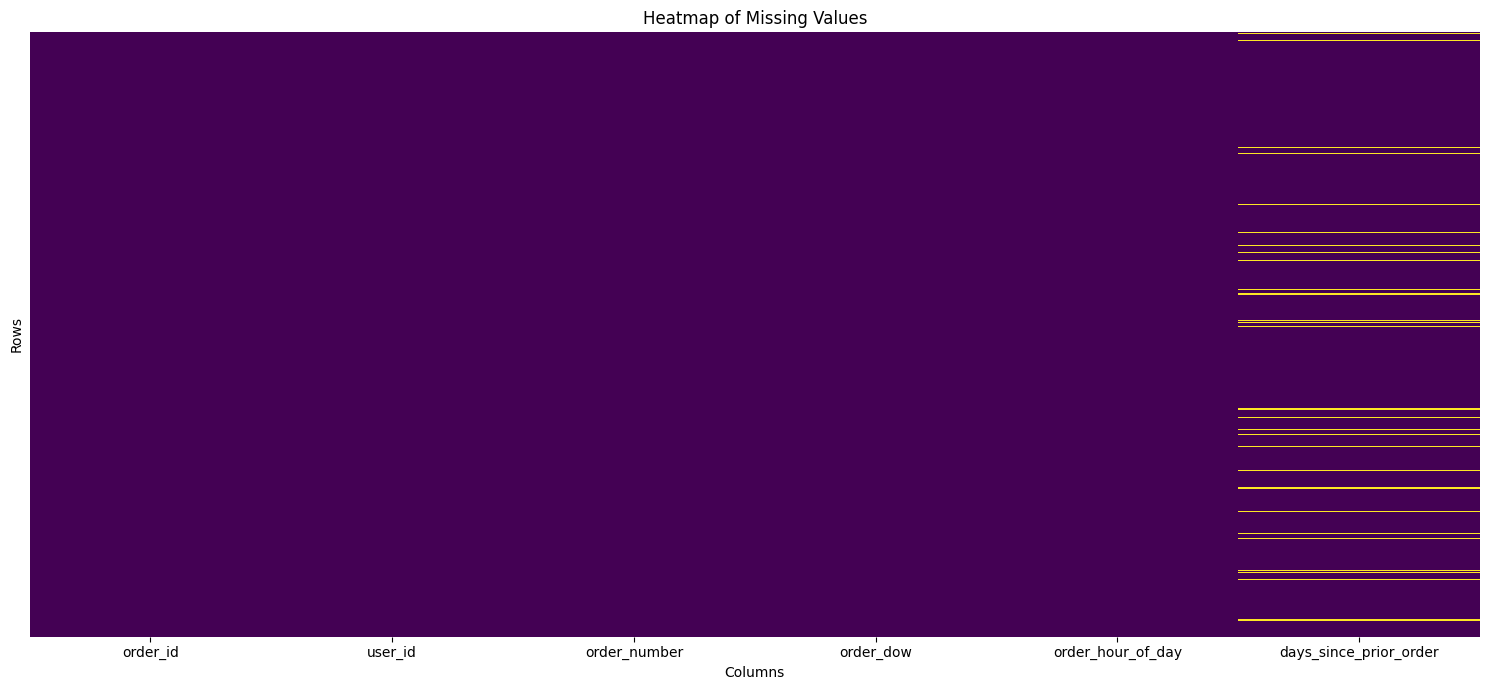

In [31]:
# Show missing values heatmap
missing_values_heatmap(df_orders)

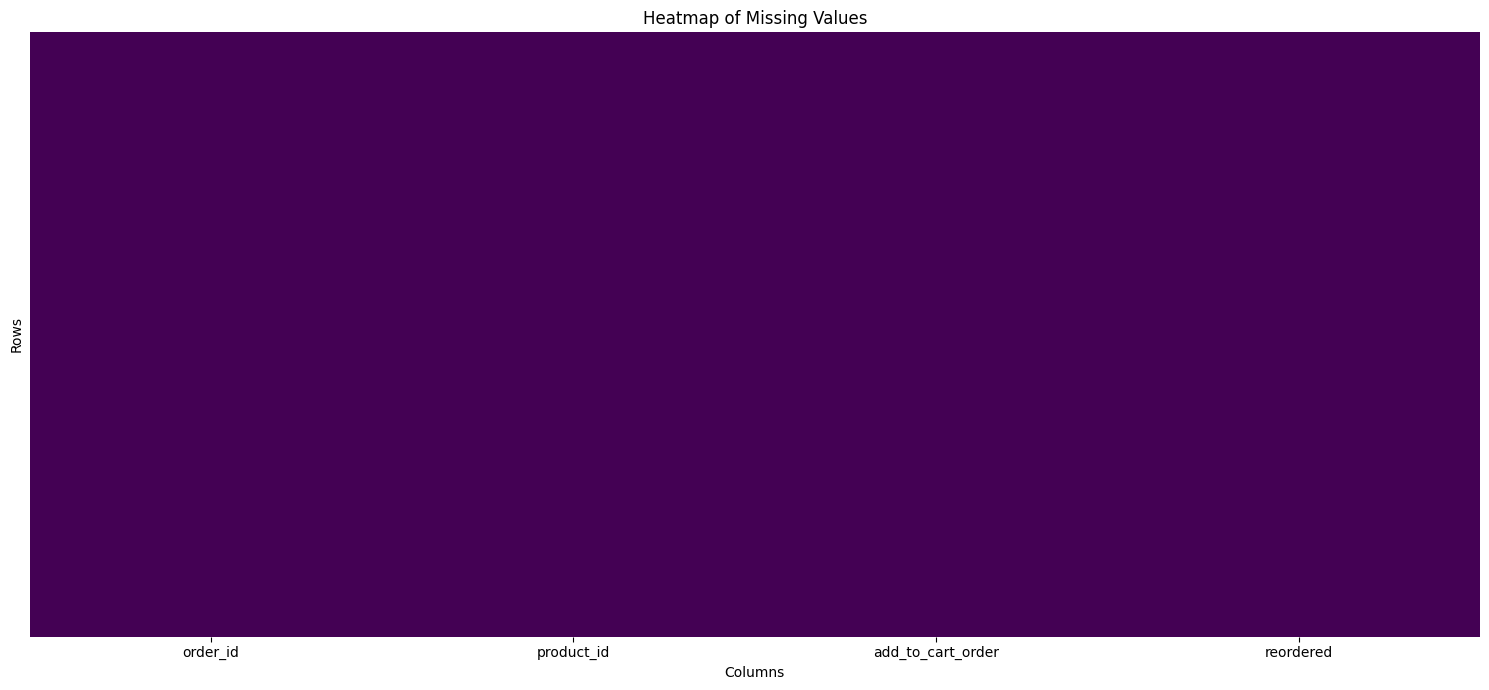

In [32]:
missing_values_heatmap(df_order_products)

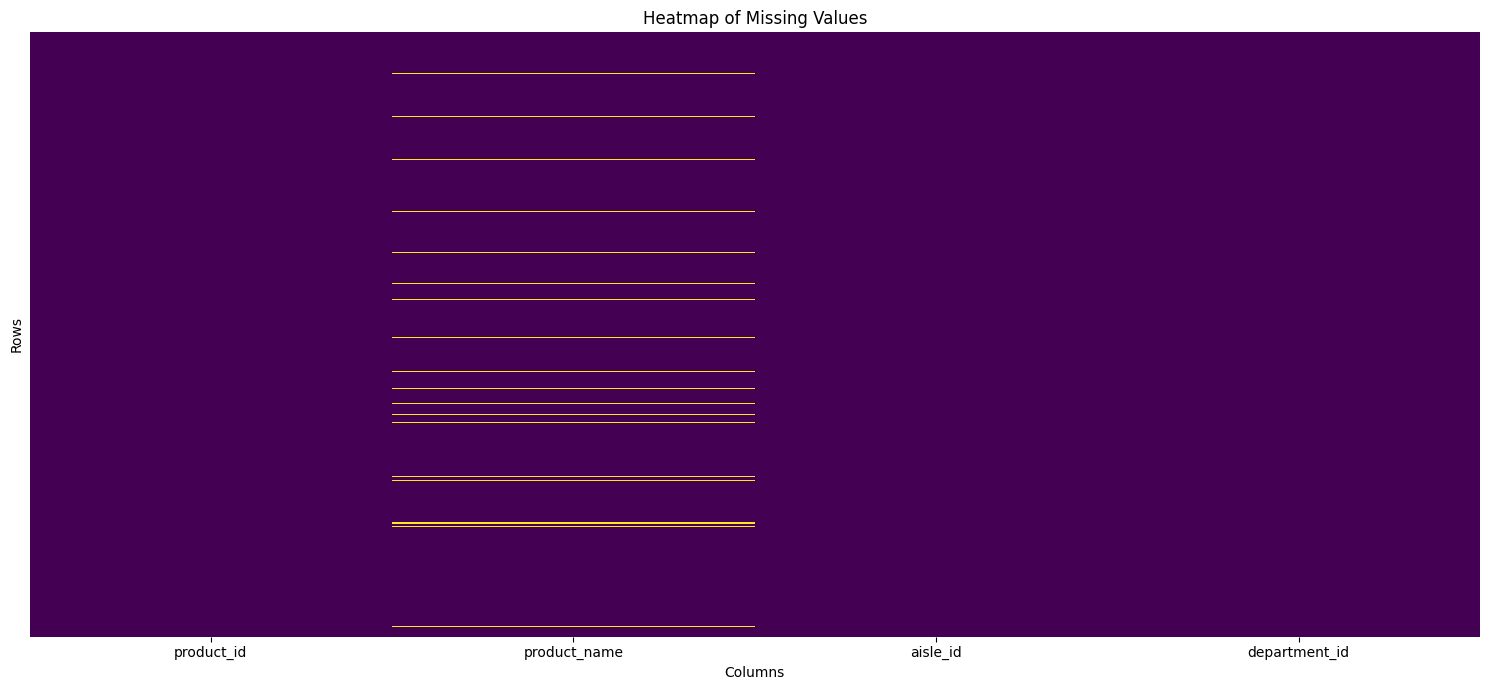

In [33]:
missing_values_heatmap(df_products)

In [34]:
# Show pd.NA missing values for 'days_since_prior_order' column
mask = df_orders['days_since_prior_order'].isna()
df_orders.loc[mask, :]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,<NA>
96,787445,25685,1,6,18,<NA>
100,294410,111449,1,0,19,<NA>
103,2869915,123958,1,4,16,<NA>
104,2521921,42286,1,3,18,<NA>
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,<NA>
478881,2222353,141211,1,2,13,<NA>
478907,2272807,204154,1,1,15,<NA>
478911,2499542,68810,1,4,19,<NA>


In [35]:
# Show pd.NA missing values for 'add_to_cart_order' column
mask = df_order_products['add_to_cart_order'].isna()
df_order_products.loc[mask, :]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,<NA>,0
9926,1968313,43867,<NA>,0
14394,2926893,11688,<NA>,0
16418,1717990,4142,<NA>,0
30114,1959075,42828,<NA>,1
...,...,...,...,...
4505662,1800005,7411,<NA>,0
4511400,1633337,260,<NA>,0
4517562,404157,9517,<NA>,0
4534112,1673227,17835,<NA>,0


In [36]:
# Show pd.NA missing values for 'product_name' column
mask = df_products['product_name'].isna()
df_products.loc[mask, :]

,product_id,product_name,aisle_id,department_id
37,38,<NA>,100,21
71,72,<NA>,100,21
109,110,<NA>,100,21
296,297,<NA>,100,21
416,417,<NA>,100,21
...,...,...,...,...
49552,49553,<NA>,100,21
49574,49575,<NA>,100,21
49640,49641,<NA>,100,21
49663,49664,<NA>,100,21


#### 3.3.4  Missing values data imputation

In [37]:
# Handle df_orders pd.NA missing values within 'days_since_prior_order' column
df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].fillna(0)
df_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [38]:
# Handle df_order_products pd.NA missing values within 'add_to_cart_order' column
df_order_atco = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), :]
df_order_atco

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,<NA>,0
9926,1968313,43867,<NA>,0
14394,2926893,11688,<NA>,0
16418,1717990,4142,<NA>,0
30114,1959075,42828,<NA>,1
...,...,...,...,...
4505662,1800005,7411,<NA>,0
4511400,1633337,260,<NA>,0
4517562,404157,9517,<NA>,0
4534112,1673227,17835,<NA>,0


In [39]:
df_order_id_atco_mv = df_order_products.groupby('order_id')['add_to_cart_order'].count()
df_order_id_atco_mv

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: add_to_cart_order, Length: 450046, dtype: int64

In [40]:
# Handle df_products pd.NA missing values within 'product_name' column
display(HTML(f"> Aisle id (100): <b>{df_aisles.iloc[99, 1]}</b>"))
display(HTML(f"> Department id (21): <b>{df_departments.iloc[20, 1]}</b>"))

In [41]:
df_products['product_name'] = df_products['product_name'].fillna('unknown')
df_products

,product_id,product_name,aisle_id,department_id
0,1,chocolate_sandwich_cookies,61,19
1,2,all_seasons_salt,104,13
2,3,robust_golden_unsweetened_oolong_tea,94,7
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1
4,5,green_chile_anytime_sauce,5,13
...,...,...,...,...
49689,49690,high_performance_energy_drink,64,7
49690,49691,original_pancake_waffle_mix,130,14
49691,49692,organic_instant_oatmeal_light_maple_brown_sugar,130,14
49692,49693,spring_water_body_wash,127,11


In [42]:
display(HTML(f"> Missing values in <b>df_orders</b>: <i>{df_orders['days_since_prior_order'].isna().sum()}</i>"))

In [43]:
display(HTML(f"> Missing values in <b>df_order_products</b>: <i>{df_order_products['add_to_cart_order'].isna().sum()}</i>"))

In [44]:
display(HTML(f"> Missing values in <b>df_products</b>: <i>{df_products['product_name'].isna().sum()}</i>"))

##### `LSPL`

**Note:** 

1. Missing values in __df_orders__, _days_since_prior_order_ column, in firt time order

Missing values in the `days_since_prior_order` column occur exclusively on rows where `order_number == 1`, indicating that these are users’ first recorded purchases. Since there is no previous order to compare against, the number of days since a prior order is undefined. However, representing these cases as `0` is both numerically and semantically appropriate — it marks the starting point of the user’s purchase history.

__Solution_: All missing values in `days_since_prior_order` will be filled with `0` to denote the absence of prior orders. This preserves the column as fully numeric and ensures consistency for aggregation or time-based analysis.

__Impact__: This imputation enables accurate computation of averages, gaps between orders, and user purchasing frequency without introducing NaN-related issues. It also provides a clean indicator of first-time orders across users.

2. Missing values in __df_order_products__, _add_to_cart_order_ column, in large orders (above 64 products)

Upon analyzing the df_order_products table, it was discovered that all _order_id's_ with more than 64 products have missing values (`NaN`) in the `add_to_cart_order` column. This column is intended to represent the sequential position in which products were added to the cart. The issue suggests a possible data export limitation or a system bug that fails to assign values beyond the 64th item.

__Solution__: Instead of imputing arbitrary values (e.g., 0), which could introduce logical inconsistencies. These missing values will be preserved as `NaN` and handled appropriately during modeling or further analysis.

__Impact__: This anomaly affects a small but important subset of the data (orders with unusually large carts). If not handled correctly, it could distort features related to user purchase behavior or product placement in cart sequences. Properly flagging and isolating these cases ensures the integrity of downstream analyses and modeling workflows.

3. Missing values in __df_products__, _product_name_ column

Rows in the `df_products` DataFrame with missing `product_name` values consistently have `aisle_id = 100` and `department_id = 21`. These IDs correspond to `aisle_name = 'missing'` and `department_name = 'missing'` in their respective reference tables. Since there is no additional metadata or product-related information in any of the related tables, it is not possible to reliably infer the actual product names for these rows.

__Solution__: To preserve data integrity and acknowledge the uncertainty, missing values in the `product_name` column will be imputed with the placeholder `unknown`. This approach avoids introducing misleading assumptions while keeping the data usable.

__Impact__: These products likely represent unidentified or incorrectly registered items in the original dataset. Treating them as `unknown` ensures they remain traceable throughout analysis and modeling, especially if product-level grouping or filtering is performed.

### 3.4 Implicit duplicates

#### 3.4.1 Implicit duplicates check

In [45]:
# Show implicit duplicates df_aisles
find_implicit_duplicates_only(df_aisles, 'aisle', threshold=90)

> Scanning for duplicates ...: 100%|██████████| 134/134 [00:00<00:00, 816.58it/s]


In [46]:
# Show implicit duplicates df_departments
find_implicit_duplicates_only(df_departments, 'department', threshold=90)

> Scanning for duplicates ...: 100%|██████████| 21/21 [00:00<00:00, 7365.20it/s]


In [47]:
# Show implicit duplicates df_products (too long to run the analysis)
#find_implicit_duplicates_only(df_products, 'product_name', threshold=90)

#### 3.4.2 Implicit duplicates data imputation

In [48]:
# No need

### 3.5 Casting data types

#### 3.5.1 Casting to string data type

In [49]:
# df_aisles 'aisles' to string
df_aisles['aisle'] = df_aisles['aisle'].astype('string')
df_aisles['aisle'].dtypes

string[python]

In [50]:
# df_departments 'department' to string
df_departments['department'] = df_departments['department'].astype('string')
df_departments['department'].dtypes

string[python]

In [51]:
# df_products 'product_name' to string
df_products['product_name'] = df_products['product_name'].astype('string')
df_products['product_name'].dtypes

string[python]

#### 3.5.2 Casting to numeric data type

In [52]:
# df_orders 'days_since_prior_order' to int
find_fail_conversion_to_numeric(df_orders, 'days_since_prior_order')

In [53]:
df_orders = convert_object_to_numeric(df_orders, type='float', include=['days_since_prior_order'])
df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].astype(int)
df_orders['days_since_prior_order'].dtypes

dtype('int64')

In [54]:
# df_order_products 'add_to_cart_order' to int
find_fail_conversion_to_numeric(df_order_products, 'add_to_cart_order')

In [55]:
df_orders_products = convert_object_to_numeric(df_order_products, type='float', include=['add_to_cart_order'])
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('Int64')
df_order_products['add_to_cart_order'].dtypes

Int64Dtype()

#### 3.5.3 Casting to category data type

In [56]:
# df_orders 'order_dow' to category
df_orders = convert_numday_strday(df_orders, ['order_dow'])
df_orders['order_dow'] = df_orders['order_dow'].astype('category')
df_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,saturday,13,30
1,1690866,163593,5,friday,12,9
2,1454967,39980,4,friday,19,2
3,1768857,82516,56,sunday,20,10
4,3007858,196724,2,thursday,12,17
...,...,...,...,...,...,...
478947,3210681,5617,5,monday,14,7
478948,3270802,112087,2,wednesday,13,6
478949,885349,82944,16,tuesday,11,6
478950,216274,4391,3,wednesday,8,8


In [57]:
df_orders['order_dow'].dtypes

CategoricalDtype(categories=['friday', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'], ordered=False, categories_dtype=object)

In [58]:
# df_orders 'order_hour_of_day' to category
df_orders['order_hour_of_day'] = df_orders['order_hour_of_day'].astype('category')
df_orders['order_hour_of_day'].dtypes


CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], ordered=False, categories_dtype=int64)

In [59]:
# df_products 'aisle_id' to category
df_products['aisle_id'] = df_products['aisle_id'].astype('category')
df_products['aisle_id'].dtypes

CategoricalDtype(categories=[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
                  ...
                  125, 126, 127, 128, 129, 130, 131, 132, 133, 134],
, ordered=False, categories_dtype=int64)

In [60]:
# df_products 'department_id' to category
df_products['department_id'] = df_products['department_id'].astype('category')
df_products['department_id'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], ordered=False, categories_dtype=int64)

#### 3.5.4 Casting to boolean data type

In [61]:
# df_order_products 'reorder' to boolean
df_order_products['reordered'] = df_order_products['reordered'].astype('boolean')
df_order_products['reordered'].dtypes


BooleanDtype

## __4. Final cleaning dataframe review__

In [62]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    string
dtypes: int64(1), string(1)
memory usage: 2.2 KB


In [63]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     string
dtypes: int64(1), string(1)
memory usage: 464.0 bytes


In [64]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   order_id                478952 non-null  int64   
 1   user_id                 478952 non-null  int64   
 2   order_number            478952 non-null  int64   
 3   order_dow               478952 non-null  category
 4   order_hour_of_day       478952 non-null  category
 5   days_since_prior_order  478952 non-null  int64   
dtypes: category(2), int64(4)
memory usage: 15.5 MB


In [65]:
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  Int64  
 3   reordered          boolean
dtypes: Int64(1), boolean(1), int64(2)
memory usage: 117.0 MB


In [66]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   product_id     49694 non-null  int64   
 1   product_name   49694 non-null  string  
 2   aisle_id       49694 non-null  category
 3   department_id  49694 non-null  category
dtypes: category(2), int64(1), string(1)
memory usage: 928.0 KB


## __5. Generate a new clean Data set .csv file__

In [67]:
project_root = Path.cwd().parent
processed_path = project_root / "data" / "processed" / "aisles_clean.csv"
df_aisles.to_csv(processed_path, index=False)

In [68]:
processed_path = project_root / "data" / "processed" / "departments_clean.csv"
df_departments.to_csv(processed_path, index=False)

In [69]:
processed_path = project_root / "data" / "processed" / "orders_clean.csv"
df_orders.to_csv(processed_path, index=False)

In [70]:
processed_path = project_root / "data" / "processed" / "order_products_clean.csv"
df_order_products.to_csv(processed_path, index=False)

In [71]:
processed_path = project_root / "data" / "processed" / "products_clean.csv"
df_products.to_csv(processed_path, index=False)